<a href="https://colab.research.google.com/github/Ahsanbeg/Multiple-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [107]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('C:\\Users\\Satakshi Gupta\\OneDrive\\Desktop\\major project\\Medical diagnosis using AI\\Datasets\\heart_disease_data.csv')

In [108]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [110]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [111]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [112]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [113]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [114]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [115]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [116]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [117]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


### **Splitting the Data into Training data & Test Data**

In [169]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [170]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [171]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [172]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9421487603305785


In [173]:
importance = model.feature_importances_
feature_names = X.columns

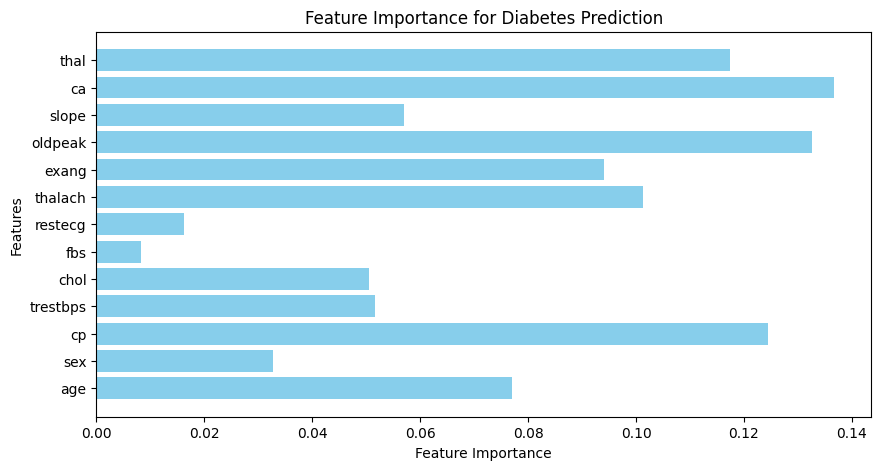

In [174]:
plt.figure(figsize = (10,5))
plt.barh(feature_names, importance, color = "skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Diabetes Prediction")
plt.show()

In [175]:
important_features = ["age", "sex", "cp", "trestbps", "chol", "thalach", "exang"]
X_selected = X[important_features]

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size = 0.2, random_state = 42, stratify=Y)
new_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, class_weight='balanced')
new_model.fit(X_train, Y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

*Model* Evaluation

Accuracy Score

In [177]:
# accuracy on training data
X_train_prediction = new_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [178]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9214876033057852


In [179]:
# accuracy on test data
from sklearn.metrics import classification_report
X_test_prediction = new_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(classification_report(Y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [180]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8032786885245902


### **Building a Predictive System**

### **Saving the trained model**

In [181]:
import pickle

In [182]:
with open("heart_disease_model.sav", "wb") as f:
    pickle.dump(new_model, f)

In [183]:
print("Optimized model saved successfully as heart_disease_model.sav")

Optimized model saved successfully as heart_disease_model.sav


In [184]:
import pickle

with open('heart_disease_model.sav', 'rb') as file:
    model = pickle.load(file)


In [185]:
# Sample input data in correct order:
# [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang]

input_data = [[58, 1, 3, 200, 354, 70, 1]]

# Define feature names
feature_names = ["age", "sex", "cp", "trestbps", "chol", "thalach", "exang"]

# Convert test to a DataFrame before prediction
df_test = pd.DataFrame([test], columns=feature_names)

# Predict using the model
prediction = new_model.predict(input_data)

# Output the prediction
print("Prediction:", prediction)


Prediction: [0]


C:\Users\Satakshi Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [187]:
test_cases = [
    [58, 1, 3, 200, 400, 70, 1],  # Risky
    [50, 1, 0, 120, 220, 180, 0],  # Healthy
    [65, 0, 2, 180, 350, 90, 1],  # Risky
    [40, 1, 1, 130, 200, 160, 0],  # Likely healthy
    [70, 0, 3, 190, 410, 60, 1],  # Very risky
]

for i, test in enumerate(test_cases):
    pred = new_model.predict([test])
    print(f"Test Case {i+1} Prediction:", "Has Heart Disease" if pred[0]==1 else "No Heart Disease")


Test Case 1 Prediction: No Heart Disease
Test Case 2 Prediction: Has Heart Disease
Test Case 3 Prediction: No Heart Disease
Test Case 4 Prediction: Has Heart Disease
Test Case 5 Prediction: No Heart Disease


C:\Users\Satakshi Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Satakshi Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Satakshi Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Satakshi Gupta\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Satakshi Gupta\AppData\Local\Pr